## School project - 5DEEP
The following notebook has been created for a school project on audio classification. The subject and the questions are available in the appendix.

The group members who participated in this project are:
- AMIMI Lamine
- BEZIN Théo
- LECOMTE Alexis
- PAWLOWSKI Maxence

### Main index
1. Data analysis
2. Data preprocessing
3. Basic ANN model
4. The CNN model
5. **The model competition (you are here)**
6. Data augmentation

# 5 - The model competition
In the previous notebook, we built a CNN model that scored well on the dataset. In this notebook, we will create several CNN models, compare them, and elect one of them as the best.

### Index
<ol type="A">
  <li>Notebook initialization</li>
  <li>Data preparation</li>
  <li>Building the models</li>
  <li>Evaluating the models</li>
  <li>Voting for the best model</li>
  <li>Conclusion of the model competition</li>
</ol>

## A - Notebook initialization
### A.1 - Imports

In [3]:
# OS and filesystem
import os
import sys
from pathlib import Path
from timeit import default_timer as timer
from datetime import timedelta

# Math
import numpy

# Data
from matplotlib import pyplot

# Model processing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras

# Console output
from colorama import Style

# Local files
sys.path.append(os.path.join(os.pardir, os.pardir))
import helpers

### A.2 - Package initialization

In [4]:
pyplot.style.use("ggplot")  # Set the matplotlib style
keras.backend.set_image_data_format("channels_last")  # Define the last value of the model input shape as the color channel

### A.3 - Constants

In [5]:
# Filesystem paths
PARENT_FOLDER = Path.cwd()
DATA_FOLDER = (PARENT_FOLDER / ".." / ".." / "data").resolve()
URBAN_DATASET_FOLDER = DATA_FOLDER / "UrbanSound8K"
MODELS_FOLDER = (PARENT_FOLDER / ".." / ".." / "models").resolve()
TEMP_FOLDER = (PARENT_FOLDER / ".." / ".." / "temp").resolve()

# Dataset
CLASSES = ["air_conditioner", "car_horn", "children_playing", "dog_bark", "drilling", "engine_idling", "gun_shot", "jackhammer", "siren", "street_music"]
N_MELS = 128

# Misc.
RANDOM_STATE = 2077

### A.4 - Dataset loading

In [6]:
features_x = numpy.load(file=(str(DATA_FOLDER / "x-mel-spectrograms_13-02-23_14-44.npy")))
features_y = numpy.load(file=(str(DATA_FOLDER / "y-mel-spectrograms_13-02-23_14-44.npy")))

## B - Data preparation
### B.1 - Label encoding

In [7]:
label_encoder = LabelEncoder()
features_y = keras.utils.to_categorical(y=label_encoder.fit_transform(features_y), num_classes=len(CLASSES))

### B.2 - Dataset splitting

In [8]:
x_train, x_test, y_train, y_test = train_test_split(features_x, features_y, test_size=0.2, random_state=RANDOM_STATE)

print(f"{Style.BRIGHT}Train set >{Style.RESET_ALL} rows: (x={len(x_train)}, y={len(y_train)}) | shape: (x={x_train.shape}, y={y_train.shape})")
print(f"{Style.BRIGHT}Test set >{Style.RESET_ALL} rows: (x={len(x_test)}, y={len(y_test)}) | shape: (x={x_test.shape}, y={y_test.shape})")

Train set > rows: (x=6985, y=6985) | shape: (x=(6985, 128, 173), y=(6985, 10))
Test set > rows: (x=1747, y=1747) | shape: (x=(1747, 128, 173), y=(1747, 10))


In [9]:
num_columns = 173
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], N_MELS, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], N_MELS, num_columns, num_channels)

## C - Building the models
In this section, we will define each of the models before training them on the dataset.

### C.1 - First model: Milva
The first competitor is the model we made in the previous booklet. Milva, as it is called, is a CNN model with three convolution blocks and two  [Dense](https://keras.io/api/layers/core_layers/dense/) layers to normalize the output.

Model: "CNN_Milva"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 125, 170, 32)      544       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 85, 32)       0         
 2D)                                                             
                                                                 
 activation_3 (Activation)   (None, 62, 85, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 59, 82, 64)        32832     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 20, 64)       0         
 2D)                                                             
                                                                 
 activation_4 (Activation)   (None, 14, 20, 64)        0 

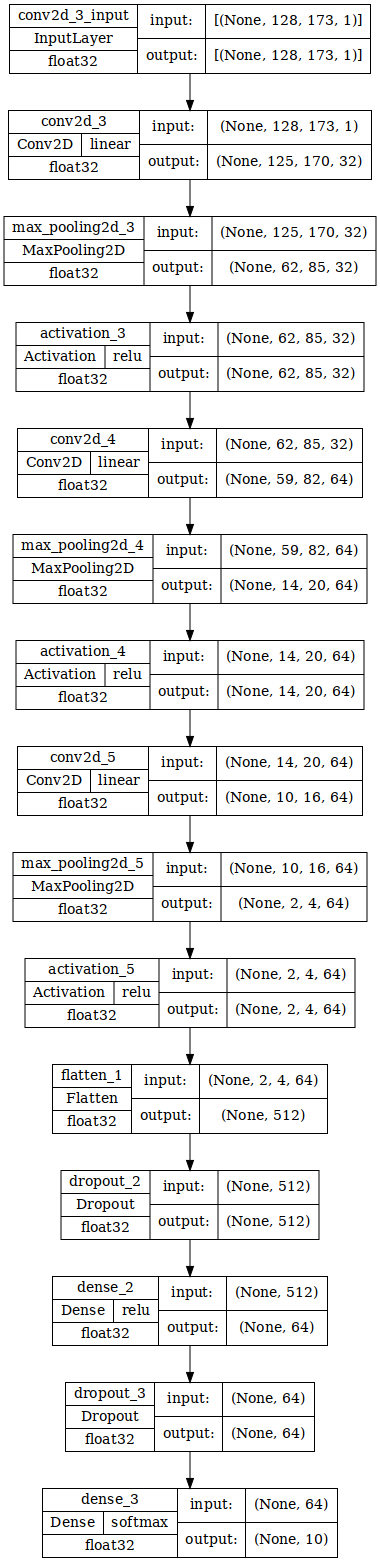

In [13]:
model_milva = helpers.ckpts.load_best_model(models_folder=MODELS_FOLDER, base_name="2_model-cnn-milva-ckpt")
model_milva.summary()
keras.utils.plot_model(
    model_milva,
    show_shapes=True, show_dtype=True, show_layer_names=True, show_layer_activations=True,
    rankdir="TB", dpi=72,
    to_file=(TEMP_FOLDER / "model_cnn_milva.png")
)

### C.2 - Second model: Chandelle
**TODO: Model description**

Model: "CNN_Chandelle"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 171, 64)      640       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 85, 64)       0         
 2D)                                                             
                                                                 
 activation_5 (Activation)   (None, 63, 85, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 83, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 41, 64)       0         
 2D)                                                             
                                                                 
 activation_6 (Activation)   (None, 30, 41, 64)      

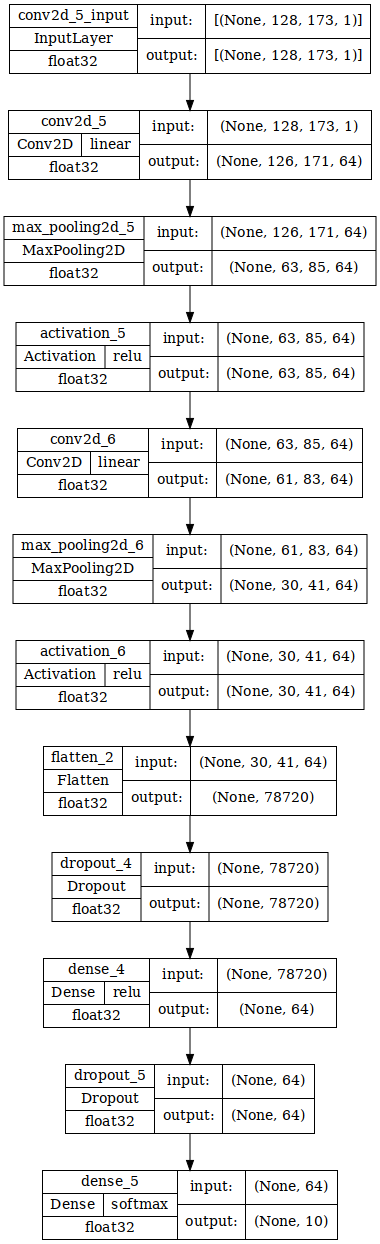

In [16]:
# Model definition
model_chandelle = keras.models.Sequential(name="CNN_Chandelle", layers=[
    # First convolution block
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=(N_MELS, num_columns, num_channels)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Activation("relu"),

    # Second convolution block
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="valid"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Activation("relu"),

    # Flatten and dropout
    keras.layers.Flatten(),
    keras.layers.Dropout(rate=0.1),

    # First dense block
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(rate=0.5),

    # Second dense block. Using softmax to reduce to output to 10
    keras.layers.Dense(len(CLASSES), activation="softmax")
])

# Model summary and plot
model_chandelle.summary()
keras.utils.plot_model(
    model_chandelle,
    show_shapes=True, show_dtype=True, show_layer_names=True, show_layer_activations=True,
    rankdir="TB", dpi=72,
    to_file=(TEMP_FOLDER / "model_cnn_chandelle.png")
)

In [ ]:
adam_optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_chandelle.compile(loss="categorical_crossentropy", optimizer=adam_optimizer, metrics=["accuracy"])

In [ ]:
chandelle_ckpt_name_base = "3_model-cnn-chandelle-ckpt"

checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=str(MODELS_FOLDER / f"{chandelle_ckpt_name_base}_e-{{epoch:02d}}_vloss-{{val_loss:.2f}}.hdf5"),
    monitor="val_loss",
    save_best_only=True,
    verbose=0
)

In [ ]:
batch_size = 128
epochs = 200

start_time = timer()
training_chandelle = model_chandelle.fit(x=x_train, y=y_train, validation_split=0.080, batch_size=batch_size, epochs=epochs, callbacks=[checkpoint_callback], verbose=1)
print(f"The training of the \"{model_chandelle.name}\" model took {timedelta(seconds=(timer() - start_time))}.")

In [ ]:
model_chandelle = helpers.ckpts.load_best_model(models_folder=MODELS_FOLDER, base_name=chandelle_ckpt_name_base)

### C.3 - Third model: Toto
**TODO: Model description**

Model: "CNN_Toto"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 126, 171, 32)      320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 63, 85, 32)       0         
 2D)                                                             
                                                                 
 activation_7 (Activation)   (None, 63, 85, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 61, 83, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 21, 64)       0         
 2D)                                                             
                                                                 
 activation_8 (Activation)   (None, 15, 21, 64)        0  

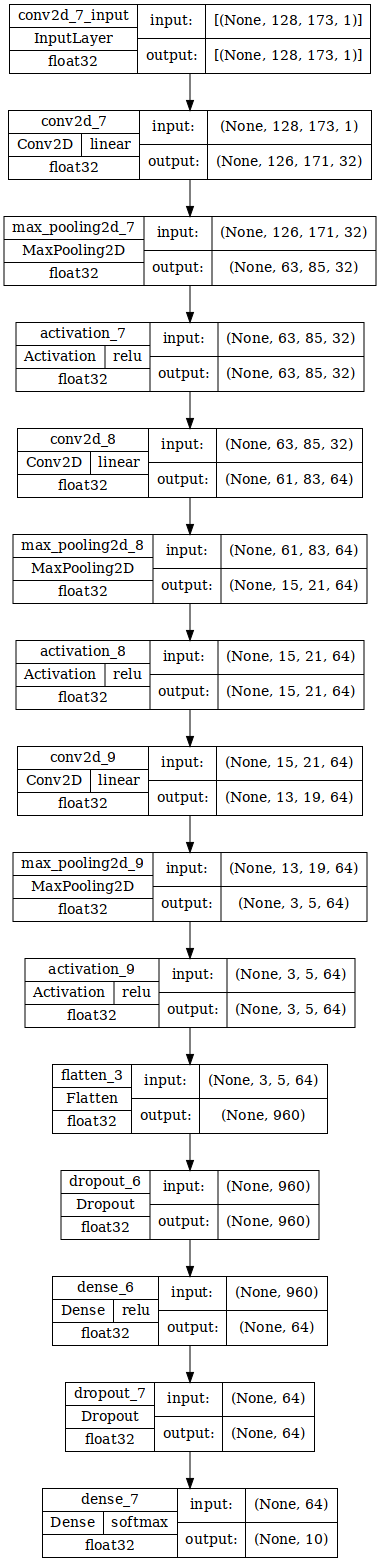

In [17]:
# Model definition
model_toto = keras.models.Sequential(name="CNN_Toto", layers=[
    # First convolution block
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(N_MELS, num_columns, num_channels)),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Activation("relu"),

    # Second convolution block
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="valid"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(4, 4)),
    keras.layers.Activation("relu"),

    # Third convolution block
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="valid"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(4, 4)),
    keras.layers.Activation("relu"),

    # Flatten and dropout
    keras.layers.Flatten(),
    keras.layers.Dropout(rate=0.2),

    # First dense block
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(rate=0.2),

    # Second dense block. Using softmax to reduce to output to 10
    keras.layers.Dense(len(CLASSES), activation="softmax")
])

# Model summary and plot
model_toto.summary()
keras.utils.plot_model(
    model_toto,
    show_shapes=True, show_dtype=True, show_layer_names=True, show_layer_activations=True,
    rankdir="TB", dpi=72,
    to_file=(TEMP_FOLDER / "model_cnn_toto.png")
)

In [ ]:
adam_optimizer = keras.optimizers.Adam(learning_rate=0.001)
model_toto.compile(loss="categorical_crossentropy", optimizer=adam_optimizer, metrics=["accuracy"])

In [ ]:
toto_ckpt_name_base = "4_model-cnn-toto-ckpt"

checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=str(MODELS_FOLDER / f"{toto_ckpt_name_base}_e-{{epoch:02d}}_vloss-{{val_loss:.2f}}.hdf5"),
    monitor="val_loss",
    save_best_only=True,
    verbose=0
)

In [ ]:
batch_size = 128
epochs = 200

start_time = timer()
training_toto = model_toto.fit(x=x_train, y=y_train, validation_split=0.080, batch_size=batch_size, epochs=epochs, callbacks=[checkpoint_callback], verbose=1)
print(f"The training of the \"{model_toto.name}\" model took {timedelta(seconds=(timer() - start_time))}.")

In [ ]:
model_toto = helpers.ckpts.load_best_model(models_folder=MODELS_FOLDER, base_name=toto_ckpt_name_base)

### C.4 - Fourth model: <NO_NAME>
**TODO: Model description**

Model: "CNN_NONAME"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 173, 32)      320       
                                                                 
 activation_10 (Activation)  (None, 128, 173, 32)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 171, 64)      18496     
                                                                 
 activation_11 (Activation)  (None, 126, 171, 64)      0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 63, 85, 64)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 63, 85, 64)        0         
                                                        

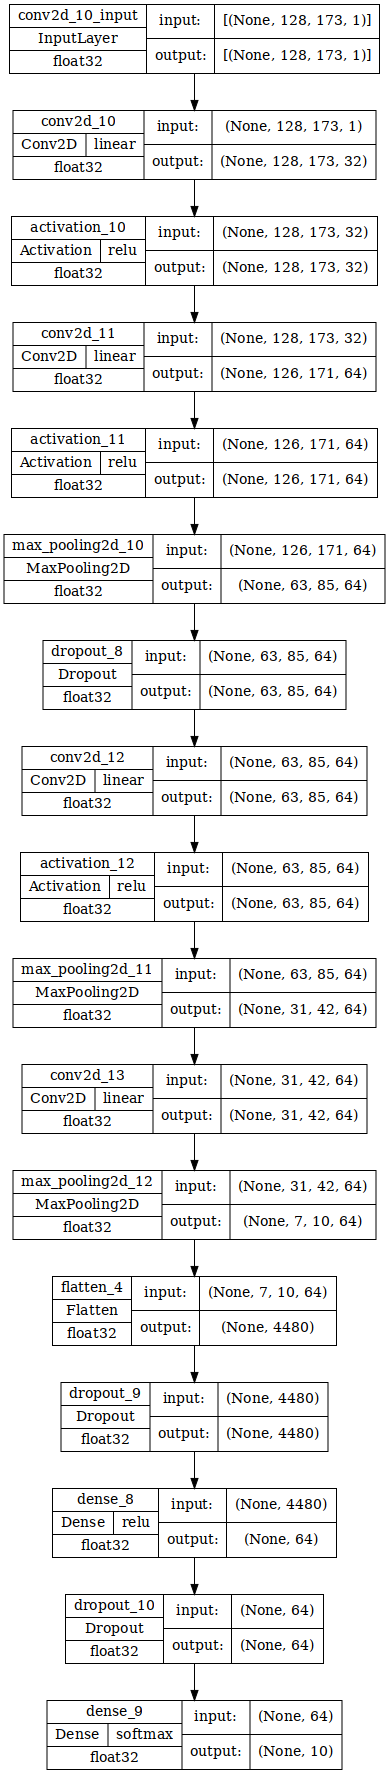

In [18]:
# Model definition
model_noname = keras.models.Sequential(name="CNN_NONAME", layers=[
    # First convolution block
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", input_shape=(N_MELS, num_columns, num_channels)),
    keras.layers.Activation("relu"),

    # Second convolution block
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3)),
    keras.layers.Activation("relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Dropout(rate=0.5),

    # Third convolution block
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same"),
    keras.layers.Activation("relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    # Fourth convolution block
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same"),
    keras.layers.MaxPooling2D(pool_size=(4, 4), strides=(4, 4)),

    # Flatten and dropout
    keras.layers.Flatten(),
    keras.layers.Dropout(rate=0.5),

    # First dense block
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(rate=0.5),

    # Second dense block. Using softmax to reduce to output to 10
    keras.layers.Dense(len(CLASSES), activation="softmax")
])

# Model summary and plot
model_noname.summary()
keras.utils.plot_model(
    model_noname,
    show_shapes=True, show_dtype=True, show_layer_names=True, show_layer_activations=True,
    rankdir="TB", dpi=72,
    to_file=(TEMP_FOLDER / "model_cnn_noname.png")
)

In [ ]:
adam_optimizer = keras.optimizers.Adam(learning_rate=0.005)
model_noname.compile(loss="categorical_crossentropy", optimizer=adam_optimizer, metrics=["accuracy"])

In [ ]:
noname_ckpt_name_base = "5_model-cnn-noname-ckpt"

checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=str(MODELS_FOLDER / f"{noname_ckpt_name_base}_e-{{epoch:02d}}_vloss-{{val_loss:.2f}}.hdf5"),
    monitor="val_loss",
    save_best_only=True,
    verbose=0
)

In [ ]:
batch_size = 128
epochs = 200

start_time = timer()
training_noname = model_noname.fit(x=x_train, y=y_train, validation_split=0.080, batch_size=batch_size, epochs=epochs, callbacks=[checkpoint_callback], verbose=1)
print(f"The training of the \"{model_noname.name}\" model took {timedelta(seconds=(timer() - start_time))}.")

In [ ]:
model_noname = helpers.ckpts.load_best_model(models_folder=MODELS_FOLDER, base_name=noname_ckpt_name_base)

<img src="../../assets/images/podium.png" alt="The model competition podium">